# ANDES Demonstration of IEEET3 on IEEE 14-Bus System

Prepared by Jinning Wang. Last revised on September 22, 2021.

In [10]:
import andes
from andes.utils.paths import get_case

andes.config_logger(stream_level=20)

In [11]:
ss = andes.load(get_case('ieee14/ieee14_ac8b.xlsx'),
                setup=False,
                no_output=True)
ss.setup()

Working directory: "/Users/jinningwang/Documents/work/andes/examples/demonstration"
Loaded config from file "/Users/jinningwang/.andes/andes.rc"
Loaded generated Python code in "~/.andes/pycode".
Parsing input file "/Users/jinningwang/Documents/work/andes/andes/cases/ieee14/ieee14_ac8b.xlsx"...
Input file parsed in 0.0665 seconds.
System internal structure set up in 0.0211 seconds.


True

## Simulation

Exciter `AC8B_1` is connected to `GENROU_5`.

In [12]:
ss.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  A total of 1 island(s) detected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
 Sparse addition: Fast in-place (kvxopt)
Power flow initialized.
0: |F(x)| = 0.5605182134
1: |F(x)| = 0.006202200332
2: |F(x)| = 5.819382825e-06
3: |F(x)| = 6.967745825e-12
Converged in 4 iterations in 0.0063 seconds.
Initialization for dynamics was successful in 0.0213 seconds.


True

In [13]:
ss.TDS.config.tf = 20
ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


<Toggler Toggler_1>: Line.Line_1 status changed to 0 at t=1.0 sec.
<Toggler Toggler_2>: Line.Line_1 status changed to 1 at t=1.1 sec.
100%|████████████████████████████████| 100/100 [00:01<00:00, 65.21%/s]

Simulation completed in 1.5338 seconds.


True

In [14]:
ss.exit_code

0

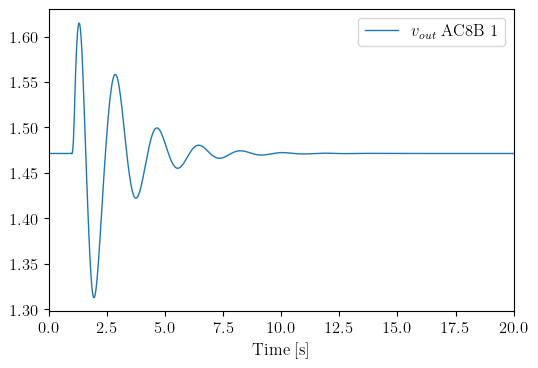

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [15]:
ss.TDS.plt.plot(ss.AC8B.vout)

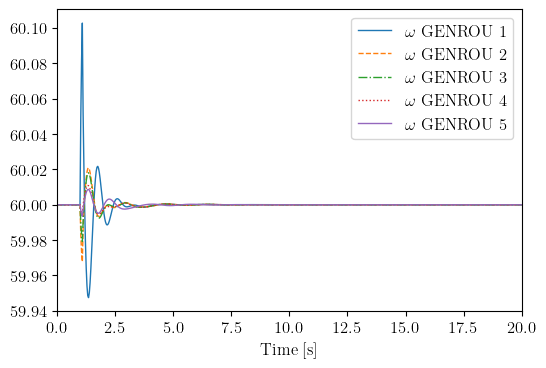

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [16]:
ss.TDS.plt.plot(ss.GENROU.omega,
                ycalc=lambda x: 60*x)

## Cleanup

In [17]:
!andes misc -C


    _           _         | Version 1.4.2.post94.dev0+g3531f1cd
   /_\  _ _  __| |___ ___ | Python 3.7.10 on Darwin, 09/22/2021 12:15:01 AM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

No output file found in the working directory.
